# Welcome to Week 5

<hr>

### Supervised Learning
In supervised learning, the data used to train the algorithm is already labeled with correct answers. In other words, you make an algorithm based on the known relationship between the input and output. From this, you develop a mapping function from the input variable $x$ to the output variable $y$ .
Instead of finding patterns based on similarity only, we can learn a direct mapping or function between feature vector $x_i$  and the output (target or label) $y_i$ such that, $y_i=h(x_i)$ .
upervised learning can appear in many forms:<br>

- Regression problems
    - Linear Regression (linear model)
    - Logistic Regression (linear model)
- Classification problems
    - Support Vector Machines (both linear and nonlinear)
    - Decision Trees (nonlinear)
    - Random Forest (nonlinear)
    - Neural Networks: Perceptron and Multi-layer Perceptron (nonlinear)
    
<hr>

## Regression
LinearRegression fits a linear model with coefficients $w = (w1, …, wp)$ to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. [More details](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
<hr>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_excel("data/data.xlsx")
df.head()

X1     X2     X3      X4   X5  X6   X7  X8     Y1
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84

<hr>

### Data wrangling
<hr>

#### Data type and null value checking
<hr>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


Text(0, 0.5, 'Y1')

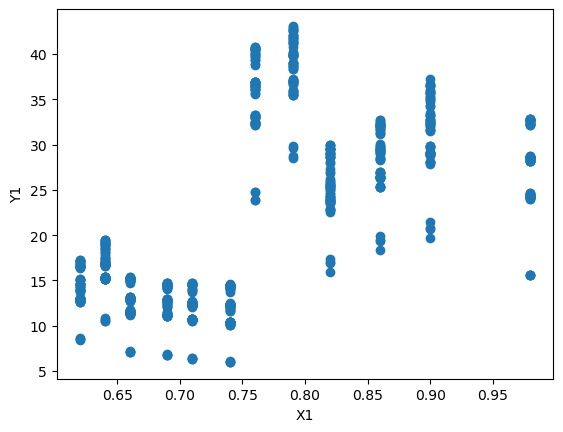

In [10]:
plt.scatter(df["X1"],df["Y1"])
plt.xlabel("X1")
plt.ylabel("Y1")

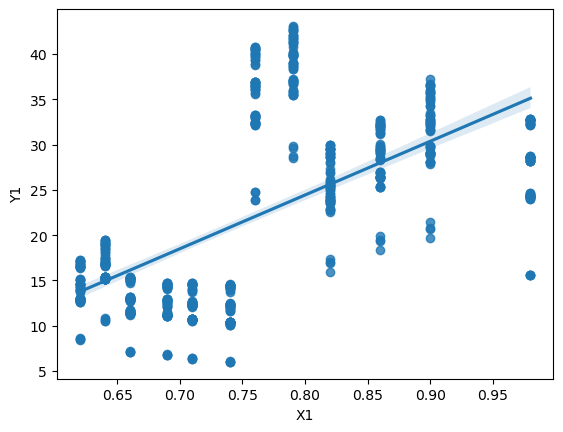

In [5]:
import seaborn as sns
# sns.pairplot(df, x_vars=list(df.columns[0:-1]), y_vars=["Y1"], height=5, aspect=.8, kind="reg");
sns.regplot(x="X1", y="Y1", data=df);

In [6]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(221)
sns.violinplot(x='X1', y='Y1',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Y1 vs X1')

ax = f.add_subplot(222)
sns.violinplot(x='X2', y='Y1',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Y1 vs X2');
ax = f.add_subplot(223)
sns.violinplot(x='X3', y='Y1',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Y1 vs X3')

ax = f.add_subplot(224)
sns.violinplot(x='X4', y='Y1',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Y1 vs X4');
<hr> plt.tight_layout()

SyntaxError: invalid syntax (314363712.py, line 16)

<hr> 

# Train and test data spliting
<hr> 

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1], test_size=0.33, random_state=42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1], test_size=0.33, random_state=42)
print("Train shape: ",X_train.shape)
print("Test shape: ",X_test.shape)

Train shape:  (514, 8)
Test shape:  (254, 8)


<hr> 

# Effect of data size in model performance

<hr> 

In [14]:
df_adver=pd.read_csv("data/Advertising.csv").dropna()

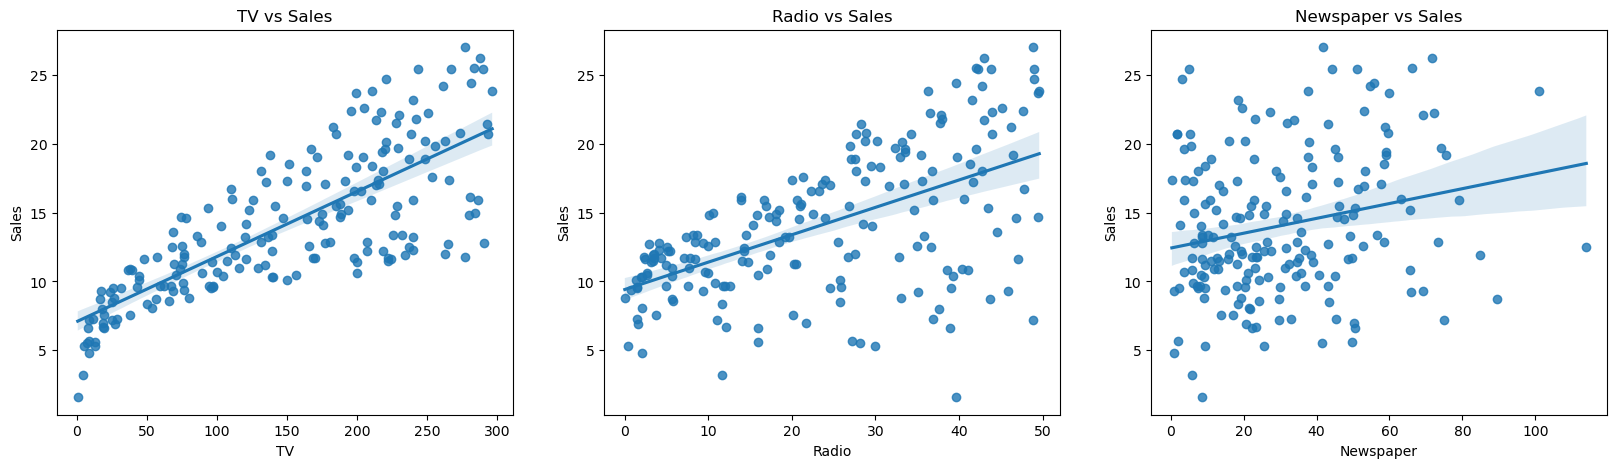

In [15]:
plt.figure(figsize=(20, 5))
for i, col in enumerate(list(df_adver.columns)[0:-2]):
    plt.subplot(1, 3 , i+1)
    sns.regplot(x=col, y='Sales', data=df_adver)
    plt.title("%s vs Sales" %(col))

<hr> 

# Feature correlation between the features and classes using Heatmap

<hr> 

<AxesSubplot:>

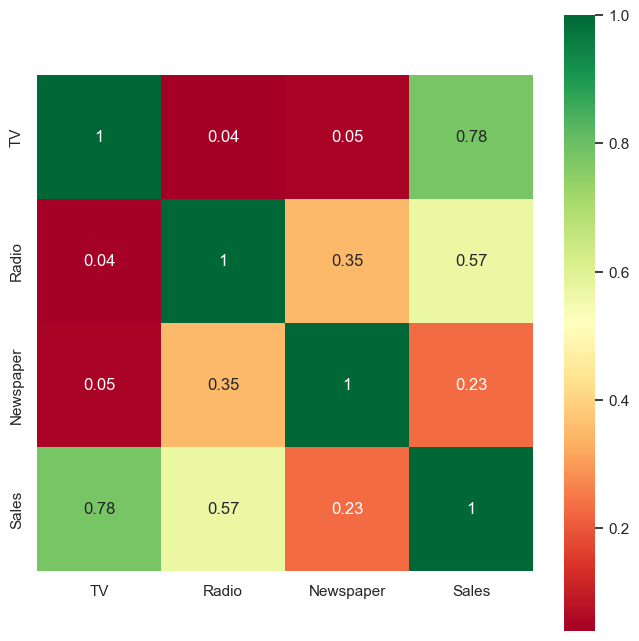

In [16]:
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(df_adver.iloc[:,0:-1].corr().round(2), square=True, cmap='RdYlGn', annot=True)

In [17]:
def getErrorwithSize(model, train_sizes, X, y):
    
    model_mse   = np.zeros(len(train_sizes))  # storing model accuracy
    model_wts   = np.zeros([len(train_sizes), 4]) # storing model weights
    
    #Train our model with increasing data for each iteration
    for size in train_sizes:   
        Xsubtrain = X[0:size,:]
        ysubtrain = y[0:size]
        model.fit(Xsubtrain, ysubtrain)
        Xtest=X[size:,:]
        ytest=y[size:]
        # Test our model on fixed test set
        ypredicts = model.predict(Xtest)    
        
        index              = (size//10)-1        
        model_mse[index]  = np.mean((ypredicts - ytest)**2)
        model_wts[index,:] = np.append(model.intercept_, model.coef_)  
    
    return model_mse, model_wts


MSE =2.49


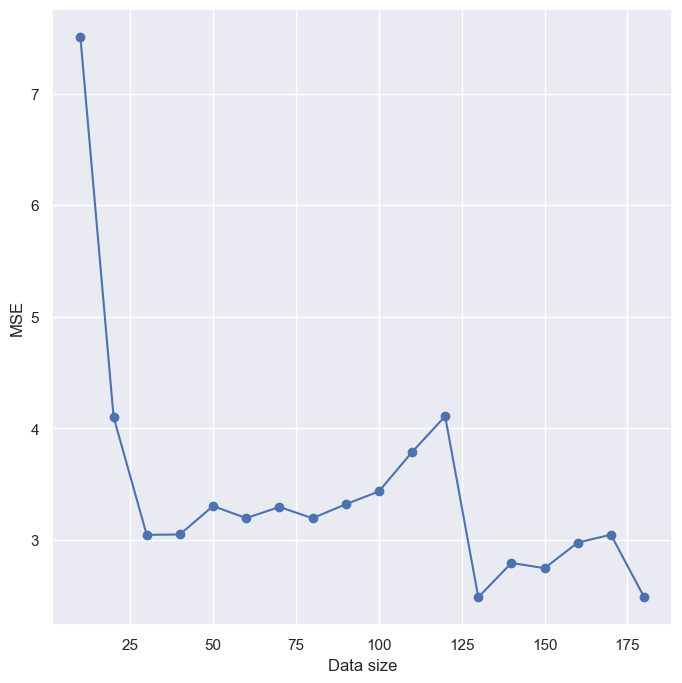

In [18]:
data_size = np.arange(10,df_adver.shape[0]-10,10) # training size from 10 to number of samples-10
my_model = LinearRegression()
model_mse, model_wts=getErrorwithSize(my_model, data_size,df_adver.iloc[:,0:-2].values, df_adver.iloc[:,-2].values)
print(f"MSE ={model_mse.min():.2f}")
plt.plot(data_size,model_mse,'o-')
plt.ylabel("MSE")
plt.xlabel("Data size")
plt.show()


<hr> 

# Improving model performance via cross-validation
- Cross-validation is useful when some particular features sort the data, and testing data does not have that data.

<hr> 

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
rcross = cross_val_score(my_model,df_adver.iloc[:,0:-2].values, df_adver.iloc[:,-2].values, cv=KFold(n_splits=5,shuffle=True))
print(f"The mean of the folds are ={rcross.mean():.2f}")

<hr> 

# Task
1. Load "boston" datasets from SKlearn and do the linear regression.
2. Report the MSE error.
3. Do  PCA and train and test the linear regression model.

<hr> 